In [1]:
# for django async setting
import os
import django
import pandas as pd
import plotly.express as px
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'rest.settings')
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
django.setup()

In [11]:
# interface
model = VHR
valid = (Validator.objects.get(name=model.name), 'gt')
query = {
    'LC': LiquidCrystal.objects.all().values_list('name'),
    'PI': Polyimide.objects.all().values_list('name'),
    'Seal': Seal.objects.all().values_list('name'),
}

querySet = model.objects.filter(
    LC__name__in=query['LC'],
    PI__name__in=query['PI'],
    seal__name__in=query['Seal'],
    value__gt=valid[0].value,
)

result = pd.DataFrame.from_records(querySet.values(
    "LC__name",
    "PI__name",
    "seal__name",
    "value",
    "vender__name"
)).rename(
    columns={
        "LC__name": "LC",
        "PI__name": "PI",
        "seal__name": "Seal",
        "vender__name": "vender",
    }
)


# value generate by customize methods
value_remark = []
condition = []

for item in querySet:
    value_remark += [item.value_remark()]
    condition += [item.cond()]

result.insert(4, 'condition', condition)
result.insert(4, 'value remark', value_remark)
result = result.astype({'value': float})

In [12]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LC            6 non-null      object 
 1   PI            6 non-null      object 
 2   Seal          6 non-null      object 
 3   value         6 non-null      float64
 4   value remark  6 non-null      object 
 5   condition     6 non-null      object 
 6   vender        6 non-null      object 
dtypes: float64(1), object(6)
memory usage: 464.0+ bytes


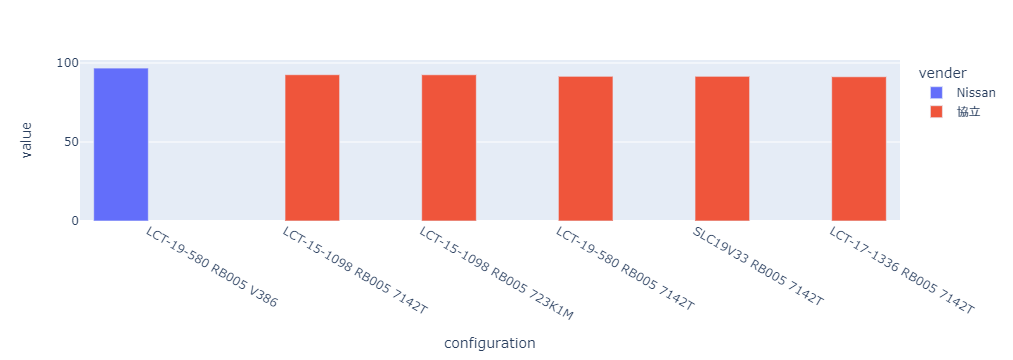

In [16]:
# plot
result_mean = result.groupby(by=['LC', 'PI', 'Seal', 'vender'], as_index=False).mean().sort_values(by=['value'], ascending=False)
result_mean['configuration'] = result_mean['LC'] + ' ' + result_mean['PI'] + ' ' + result_mean['Seal']
import plotly.express as px
fig = px.bar(result_mean,x='configuration', y='value', color='vender', barmode='group')
fig.show()

In [17]:
result['value'][0]

92.56